In [142]:
import numpy as np
import matplotlib.pyplot as plt, seaborn as sns
from lmfit.models import ExponentialModel

%matplotlib inline

In [143]:
k,gamma,D = 1.0,1.0,1.0
delta_t=0.01
G=100 # G is sampling interval, only one data point out of G simulated points is taken
ampl = np.sqrt(2*D*delta_t/float(G))
N=50000

In [144]:
# random force
w=np.random.normal(0,1,N*G)

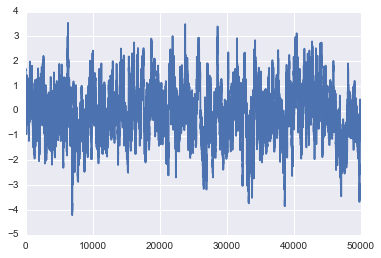

In [145]:
# differential equation x_i = x_(i-1) - k/gamma*x_(i-1) + sqrt(2*D*delta_t)*w_i
from itertools import accumulate
def next_point(x,y):
    return x - k/gamma*x*delta_t/float(G) + ampl*y

xx = np.fromiter(accumulate(w, next_point),np.float)
x = xx[::G]
plt.plot(x)

In [146]:
print("std: ",x.std(),"mean: ",x.mean())

std:  1.05504440675 mean:  -0.0683736480525


In [147]:
# see http://docs.scipy.org/doc/scipy-0.15.1/reference/generated/scipy.signal.fftconvolve.html
from scipy import signal
autocorr = signal.fftconvolve(x, x[::-1], mode='full')

[[Model]]
    Model(exponential)
[[Fit Statistics]]
    # function evals   = 25
    # data points      = 1000
    # variables        = 2
    chi-square         = 1.341
    reduced chi-square = 0.001
    Akaike info crit   = -6608.209
    Bayesian info crit = -6598.393
[[Variables]]
    amplitude:   1.02506915 +/- 0.006139 (0.60%) (init= 0.5165344)
    decay:       140.637449 +/- 1.195330 (0.85%) (init= 248.9083)
[[Correlations]] (unreported correlations are <  0.250)
    C(amplitude, decay)          = -0.705 



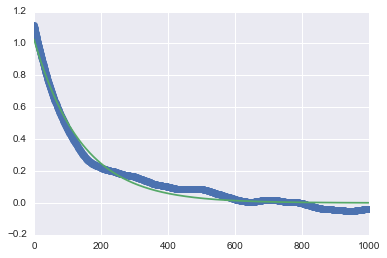

In [148]:
n=len(autocorr)
autocorr=autocorr[int((n-1)/2):]*2.0/(n+1)

mod = ExponentialModel()
y = autocorr[:min(N,1000)]
t = np.arange(min(N,1000))

pars = mod.guess(y, x=t)
out  = mod.fit(y, pars, x=t)
print(out.fit_report(min_correl=0.25))

plt.figure()
plt.plot(t,y,"o")
plt.plot(t,out.best_fit)

In [149]:
f=np.fft.rfft(x)
a=np.fft.irfft(f*np.conjugate(f))
a=np.fft.fftshift(a)/N
a=a[int(N/2):]

In [150]:
import lmfit as lm

[[Model]]
    Model(exponential)
[[Fit Statistics]]
    # function evals   = 25
    # data points      = 1000
    # variables        = 2
    chi-square         = 1.446
    reduced chi-square = 0.001
    Akaike info crit   = -6532.611
    Bayesian info crit = -6522.796
[[Variables]]
    amplitude:   1.03380505 +/- 0.006453 (0.62%) (init= 0.4632229)
    decay:       137.210635 +/- 1.215701 (0.89%) (init= 256.8769)
[[Correlations]] (unreported correlations are <  0.250)
    C(amplitude, decay)          = -0.705 



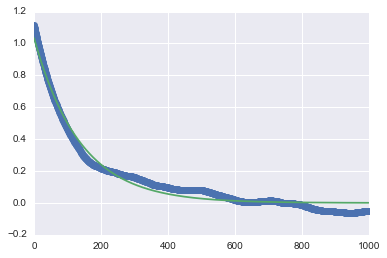

In [151]:
mod = ExponentialModel()
y = a[:min(int(N/2),1000)]
t = np.arange(min(int(N/2),1000))

pars = mod.guess(y, x=t)
out  = mod.fit(y, pars, x=t)
print(out.fit_report(min_correl=0.25))

plt.figure()
plt.plot(t,y,"o")
plt.plot(t,out.best_fit)